In [ ]:
from pathlib import Path
import pandas as pd

PRINT_RES_PER_POKEMON = False

sprites_dir = Path('pokemon_sprites')

pokemon_image_counts = {}
total_images = 0

for pokemon_dir in sprites_dir.iterdir():
    if pokemon_dir.is_dir() and not pokemon_dir.name.startswith('.'):
        pokemon_name = pokemon_dir.name
        
        # count PNG images 
        image_files = list(pokemon_dir.glob('*.png'))
        image_count = len(image_files)
        
        pokemon_image_counts[pokemon_name] = image_count
        total_images += image_count

sorted_pokemon = dict(sorted(pokemon_image_counts.items()))

if PRINT_RES_PER_POKEMON:
    print("\n" + "="*50)
    print("Images per pokemon:")
    print("="*50)
    for pokemon, count in sorted_pokemon.items():
        print(f"{pokemon}: {count} images")

print(f"Total number of images: {total_images}")
print(f"Total number of pokemon: {len(pokemon_image_counts)}")
print(f"Average images per pokemon: {total_images / len(pokemon_image_counts):.2f}")


df = pd.DataFrame(list(sorted_pokemon.items()), columns=['Pokemon', 'Image_Count'])
print("\n" + "="*50)
print("Summary Statistics:")
print("="*50)
print(f"Min images per pokemon: {df['Image_Count'].min()}")
print(f"Max images per pokemon: {df['Image_Count'].max()}")
print(f"Median images per pokemon: {df['Image_Count'].median()}")
print(f"Standard deviation: {df['Image_Count'].std():.2f}")

print(f"\nPokemon with most images: {df.loc[df['Image_Count'].idxmax(), 'Pokemon']} ({df['Image_Count'].max()} images)")
print(f"Pokemon with least images: {df.loc[df['Image_Count'].idxmin(), 'Pokemon']} ({df['Image_Count'].min()} images)")

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('pokemon.csv')

# Show dimensions
print(f"Pokemon dataset dimensions: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Optional: Show column names
print(f"\nColumn names:")
print(df.columns.tolist())

# Optional: Show first few rows to understand the data structure
print(f"\nFirst 5 rows:")
print(df.head())

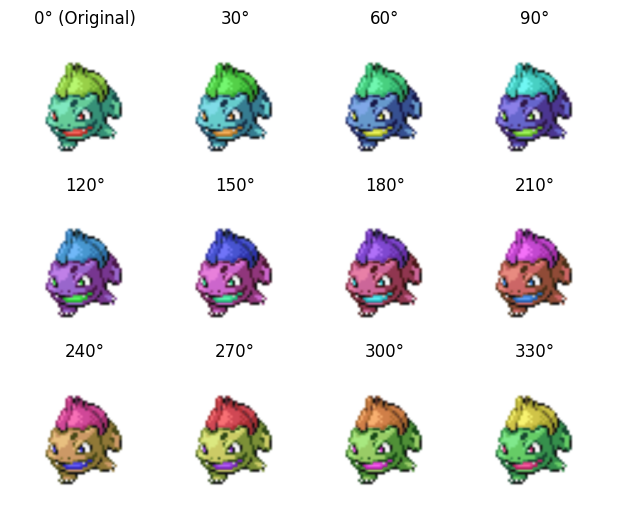

In [29]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def crop_image_padding(img):
    padding_crop=5
    width, height = img.size
    left = padding_crop
    top = padding_crop
    right = width - padding_crop
    bottom = height - padding_crop
    
    if right > left and bottom > top:
        return img.crop((left, top, right, bottom))
    return img

def plot_hue_shift_examples():
    image_dir = "hue_shift_examples"
    
    hue_shifts = [
        (0, "original_bulbasaur.png"),
        (30, "hue_shift_30_bulbasaur.png"),
        (60, "hue_shift_60_bulbasaur.png"),
        (90, "hue_shift_90_bulbasaur.png"),
        (120, "hue_shift_120_bulbasaur.png"),
        (150, "hue_shift_150_bulbasaur.png"),
        (180, "hue_shift_180_bulbasaur.png"),
        (210, "hue_shift_210_bulbasaur.png"),
        (240, "hue_shift_240_bulbasaur.png"),
        (270, "hue_shift_270_bulbasaur.png"),
        (300, "hue_shift_300_bulbasaur.png"),
        (330, "hue_shift_330_bulbasaur.png")
    ]
    _, axes = plt.subplots(3, 4, figsize=(6, 5))
    
    axes = axes.flatten()
    
    for i, (degrees, filename) in enumerate(hue_shifts):
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)
        
        # Crop the padding from the image
        img_cropped = crop_image_padding(img)
        
        axes[i].imshow(img_cropped)
        
        if degrees == 0:
            axes[i].set_title('0° (Original)', fontsize=12)
        else:
            axes[i].set_title(f'{degrees}°', fontsize=12)
        
        axes[i].axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0, top=1.0, bottom=0.0, left=0.0, right=1.0)
    
    plt.savefig('hue_shift_examples_grid.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    plot_hue_shift_examples()